Part 2

In [1]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
total_sample = 1000000

In [3]:
x1 = np.random.normal(3,2,total_sample)
x2 = np.random.normal(-1,2,total_sample)
e = np.random.normal(0,2,total_sample)
B = np.array([[3,1,2]])


In [4]:
B.shape

(1, 3)

In [5]:
X = np.ones((total_sample,3))
Y = np.ones((total_sample,1))

In [6]:
for i in range(1,3):
    for j in range(total_sample):
        if i == 1:
            X[j,i] = x1[j]
        else:
            X[j,i] = x2[j]

for j in range(total_sample):
    Y[j,0] = (X[j]@B.T).item() + e[j]


In [7]:
Y_train = Y[:int(0.8 * total_sample),:]
X_train = X[:int(0.8 * total_sample),:]
Y_test = Y[int(0.8 * total_sample)+1:,:]
X_test = X[int(0.8 * total_sample)+1:,:]

Creating Random Shuffle 

In [8]:
idx = np.random.permutation(X_train.shape[0])
X_train_shuffled = X_train[idx]
Y_train_shuffled = Y_train[idx]

In [9]:
B_init = np.array([[0.,0.,0.]])

In [10]:
def hypothesis(X,B):
    return X@B.T

def loss_fun(X,Y,B):
    m = len(Y)
    H = hypothesis(X,B)
    error = (Y - H)
    return (error.T@ error )/(2*m)
    

In [11]:
def stoachstic_gradient_descent(r,alpha,epoch,X,Y):
    idx = np.random.permutation(X_train.shape[0])
    X = X[idx]
    Y = Y[idx]
    B = np.zeros((1,X.shape[1]))
    

    m = len(X)
    delta = float('inf')
    cnt  = 0

    loss =  loss_fun(X[0:r ,: ],Y[0:r ,: ],B)

 
    
    for ep in range(epoch):
       
        for cnt in range(m//r):

            start = (cnt * r) 
            end = min(start + r, m) 
            X_epoch = X[start:end, :]
            Y_epoch = Y[start:end, :]
            H_epoch = hypothesis(X_epoch,B)

            
            grad = np.dot((Y_epoch - H_epoch).T, X_epoch) / len(X_epoch)
            nrm = np.linalg.norm(alpha*grad)
            
            if nrm < 1e-6 or int((ep ) * m//r + cnt) > 1e5  : # make nrm < 1e-10 for r == 1 
            # if nrm < 1e-10:    
                print(f"total iter = {(ep ) * m//r + cnt} , B = {B} ,norm = {nrm} ")
                return B
            B = B + alpha * grad

            delta = loss - loss_fun(X_epoch,Y_epoch,B)
            loss = loss_fun(X_epoch,Y_epoch,B)
            
            cnt += 1 
           
            

        # print(f"epoch = {ep}  , B = {B[0]} " , f"Loss = {loss}" ,f"Delta = {delta} , norm = {np.linalg.norm(alpha*grad)}")
    print(f"total iter = {(ep ) * m//r + cnt} , B = {B} , norm = {nrm}")
    

 
    return B  

    



In [12]:
B_expected = np.array([[3,1,2]])
print(B_expected)
print(f"Training Loss - {loss_fun(X_train,Y_train,B_expected)}, Test Loss -{loss_fun(X_test,Y_test,B_expected)}, expected  - {B_expected}")

[[3 1 2]]
Training Loss - [[2.00267287]], Test Loss -[[1.98493988]], expected  - [[3 1 2]]


In [13]:
alpha = 0.001
epoch = 100
r = 1
B_sgd = stoachstic_gradient_descent(r,alpha,epoch,X_train,Y_train)
print(B_sgd)
loss_sgd_test  = loss_fun(X_test,Y_test,B_sgd)
loss_sgd_train = loss_fun(X_train,Y_train,B_sgd)
print(f"Training Loss - {loss_sgd_train}, Test Loss -{loss_sgd_test}, Learned Parameters - {B_sgd}")

total iter = 281 , B = [[0.41206098 1.32648096 1.03068059]] ,norm = 7.337222825824042e-07 
[[0.41206098 1.32648096 1.03068059]]
Training Loss - [[4.29418167]], Test Loss -[[4.3000966]], Learned Parameters - [[0.41206098 1.32648096 1.03068059]]


In [14]:
alpha = 0.001
epoch = 100
r = 80
B_sgd = stoachstic_gradient_descent(r,alpha,epoch,X_train,Y_train)
print(B_sgd)
loss_sgd_test  = loss_fun(X_test,Y_test,B_sgd)
loss_sgd_train = loss_fun(X_train,Y_train,B_sgd)
print(f"Training Loss - {loss_sgd_train}, Test Loss -{loss_sgd_test}, Learned Parameters - {B_sgd}")

total iter = 100001 , B = [[2.99693458 0.99842882 1.99829996]] ,norm = 0.0018985886337688717 
[[2.99693458 0.99842882 1.99829996]]
Training Loss - [[2.00268239]], Test Loss -[[1.98499226]], Learned Parameters - [[2.99693458 0.99842882 1.99829996]]


In [ ]:
alpha = 0.001
epoch = 100000
r = 800000
B_sgd = stoachstic_gradient_descent(r,alpha,epoch,X_train,Y_train)
print(B_sgd)
loss_sgd_test  = loss_fun(X_test,Y_test,B_sgd)
loss_sgd_train = loss_fun(X_train,Y_train,B_sgd)
print(f"Training Loss - {loss_sgd_train}, Test Loss -{loss_sgd_test}, Learned Parameters - {B_sgd}")

In [ ]:
alpha = 0.001
epoch = 1000
r = 8000
B_sgd = stoachstic_gradient_descent(r,alpha,epoch,X_train,Y_train)
print(B_sgd)
loss_sgd_test  = loss_fun(X_test,Y_test,B_sgd)
loss_sgd_train = loss_fun(X_train,Y_train,B_sgd)
print(f"Training Loss - {loss_sgd_train}, Test Loss -{loss_sgd_test}, Learned Parameters - {B_sgd}")

total iter = 100000 , B = [[3.00067086 0.99938626 2.00157457]] , norm = 3.381687910178732e-05
[[3.00067086 0.99938626 2.00157457]]
Training Loss - [[1.99694505]], Test Loss -[[1.9974594]], Learned Parameters - [[3.00067086 0.99938626 2.00157457]]


In [ ]:
def noraml_thetha(X,Y):
    T = X.T@X
    T_inv = np.linalg.inv(T)
    return T_inv @ (X.T @Y)

B_normal = noraml_thetha(X_train,Y_train).T

In [ ]:
loss_normal_test = loss_fun(X_test,Y_test,B_normal)
loss_normal_train = loss_fun(X_train,Y_train,B_normal)

print(f"Training Loss - {loss_normal_train}, Test Loss -{loss_normal_test}, Learned Parameters - {B_normal}")

Training Loss - [[1.99694497]], Test Loss -[[1.99746348]], Learned Parameters - [[3.00054272 0.99932353 2.00163334]]


In [ ]:
loss_sgd_test  = loss_fun(X_test,Y_test,B_sgd)
loss_sgd_train = loss_fun(X_train,Y_train,B_sgd)

print(f"Training Loss - {loss_sgd_train}, Test Loss -{loss_sgd_test}, Learned Parameters - {B_sgd}")

Training Loss - [[2.00178426]], Test Loss -[[2.00349135]], Learned Parameters - [[2.8165524  1.03955234 1.98826472]]


In [16]:
def stoachstic_gradient_descent_plot(r,alpha,epoch,X,Y):
    idx = np.random.permutation(X_train.shape[0])
    X = X[idx]
    Y = Y[idx]
    B = np.zeros((1,X.shape[1]))
    

    m = len(X)
    delta = float('inf')
    cnt  = 0

    loss =  loss_fun(X[0:r ,: ],Y[0:r ,: ],B)

    B0 = [0]
    B1 = [0]
    B2 = [0]
    
    
    for ep in range(epoch):
       
        for cnt in range(m//r):

            start = (cnt * r) 
            end = min(start + r, m) 
            X_epoch = X[start:end, :]
            Y_epoch = Y[start:end, :]
            H_epoch = hypothesis(X_epoch,B)

            
            grad = np.dot((Y_epoch - H_epoch).T, X_epoch) / len(X_epoch)
            nrm = np.linalg.norm(alpha*grad)
            
            if nrm < 1e-10 or int((ep ) * m//r + cnt) > 1e5  :
             
                print(f"total iter = {(ep ) * m//r + cnt} , B = {B} ,norm = {nrm} ")
                return np.array(B0),np.array(B1),np.array(B2)
            B = B + alpha * grad

            delta = loss - loss_fun(X_epoch,Y_epoch,B)
            loss = loss_fun(X_epoch,Y_epoch,B)
            
            cnt += 1 
           
            B0.append(B[0][0])
            B1.append(B[0][1])
            B2.append(B[0][2])
            

        # print(f"epoch = {ep}  , B = {B[0]} " , f"Loss = {loss}" ,f"Delta = {delta} , norm = {np.linalg.norm(alpha*grad)}")
    print(f"total iter = {(ep ) * m//r + cnt} , B = {B} , norm = {nrm}")
    return np.array(B0),np.array(B1),np.array(B2)

def sgd_plot(alpha , epoch , r ,X_train , Y_train ):
    plt.clf()

    B0,B1,B2 = stoachstic_gradient_descent_plot(r,alpha,epoch,X_train,Y_train)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(B0, B1, B2, color='blue', linewidth=2, label="Curve")

    ax.set_xlabel("θ0 axis")
    ax.set_ylabel("θ1 axis")
    ax.set_zlabel("θ2 axis")

    plt.show()

total iter = 100001 , B = [[3.05678232 0.98461468 2.05846706]] ,norm = 0.014288308328471767 


<Figure size 640x480 with 0 Axes>

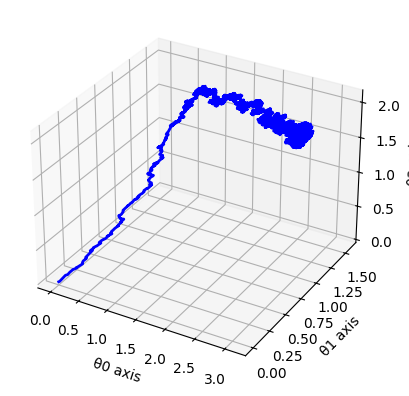

In [17]:
alpha = 0.001
epoch = 100
r = 1
sgd_plot(alpha, epoch ,r ,X_train , Y_train)

epoch = 0  , B = [2.81947564 1.04202878 1.98547636]  Loss = [[1.85651395]] Delta = [[-0.72734377]] , norm = 0.0010387289675506677
epoch = 1  , B = [2.99139533 1.00459278 1.99824991]  Loss = [[1.8305542]] Delta = [[-0.68629703]] , norm = 0.000970386462983932
epoch = 2  , B = [3.00277353 1.00211514 1.9990953 ]  Loss = [[1.82914139]] Delta = [[-0.68355672]] , norm = 0.0009660120781878314
epoch = 3  , B = [3.00352658 1.00195117 1.99915125]  Loss = [[1.82904922]] Delta = [[-0.68337525]] , norm = 0.0009657232671700282
epoch = 4  , B = [3.00357642 1.00194031 1.99915496]  Loss = [[1.82904313]] Delta = [[-0.68336324]] , norm = 0.0009657041557962011
epoch = 5  , B = [3.00357972 1.0019396  1.9991552 ]  Loss = [[1.82904273]] Delta = [[-0.68336245]] , norm = 0.0009657028909566631
epoch = 6  , B = [3.00357994 1.00193955 1.99915522]  Loss = [[1.8290427]] Delta = [[-0.6833624]] , norm = 0.0009657028072455153
epoch = 7  , B = [3.00357995 1.00193955 1.99915522]  Loss = [[1.8290427]] Delta = [[-0.6833623

<Figure size 640x480 with 0 Axes>

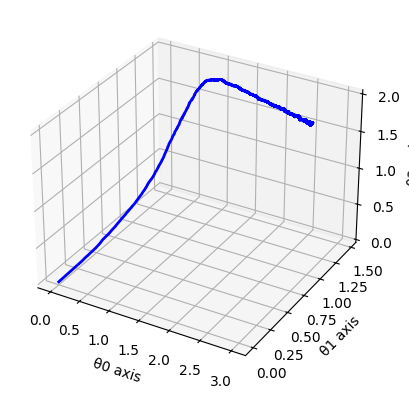

In [ ]:
alpha = 0.001
epoch = 100
r = 80
sgd_plot(alpha, epoch ,r ,X_train , Y_train)

epoch = 0  , B = [0.24478442 0.91594338 0.46629198]  Loss = [[8.08658895]] Delta = [[-0.36649273]] , norm = 0.007076765416969979
epoch = 1  , B = [0.35593369 1.21405226 0.88369764]  Loss = [[5.15152604]] Delta = [[-0.26843146]] , norm = 0.00430830033548136
epoch = 2  , B = [0.43526654 1.33846463 1.18825823]  Loss = [[3.93838029]] Delta = [[-0.20201156]] , norm = 0.0029076450291433773
epoch = 3  , B = [0.50592464 1.40111639 1.39905776]  Loss = [[3.37218315]] Delta = [[-0.16334671]] , norm = 0.002021200815018751
epoch = 4  , B = [0.5731992  1.43488482 1.54291833]  Loss = [[3.09185944]] Delta = [[-0.14039108]] , norm = 0.0014523712151111666
epoch = 5  , B = [0.63833013 1.4522367  1.64098531]  Loss = [[2.94118202]] Delta = [[-0.12609349]] , norm = 0.001096981892377199
epoch = 6  , B = [0.70163665 1.45935104 1.70814016]  Loss = [[2.85015679]] Delta = [[-0.11669629]] , norm = 0.0008832306805068267
epoch = 7  , B = [0.76322776 1.45987065 1.75451162]  Loss = [[2.7872467]] Delta = [[-0.11016947

<Figure size 640x480 with 0 Axes>

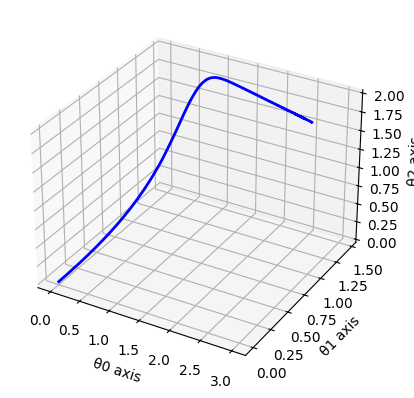

In [ ]:
alpha = 0.001
epoch = 1000
r = 8000
sgd_plot(alpha, epoch ,r ,X_train , Y_train)

epoch = 0  , B = [0.00399795 0.01598633 0.00401975]  Loss = [[19.71972777]] Delta = [[0.28601271]] , norm = 0.016961862585459706
epoch = 1  , B = [0.00794795 0.03176496 0.00807132]  Loss = [[19.4403908]] Delta = [[0.27933697]] , norm = 0.016762545407277646
epoch = 2  , B = [0.01185072 0.04733882 0.01215389]  Loss = [[19.16754775]] Delta = [[0.27284305]] , norm = 0.016566357780418067
epoch = 3  , B = [0.01570695 0.06271082 0.01626664]  Loss = [[18.90102203]] Delta = [[0.26652573]] , norm = 0.01637325197367008
epoch = 4  , B = [0.01951732 0.0778838  0.02040876]  Loss = [[18.64064207]] Delta = [[0.26037996]] , norm = 0.016183180911300832
epoch = 5  , B = [0.02328249 0.09286057 0.02457947]  Loss = [[18.38624124]] Delta = [[0.25440083]] , norm = 0.015996098163468923
epoch = 6  , B = [0.02700314 0.10764391 0.02877799]  Loss = [[18.13765767]] Delta = [[0.24858357]] , norm = 0.01581195793681295
epoch = 7  , B = [0.03067992 0.12223656 0.03300355]  Loss = [[17.89473412]] Delta = [[0.24292355]] ,

<Figure size 640x480 with 0 Axes>

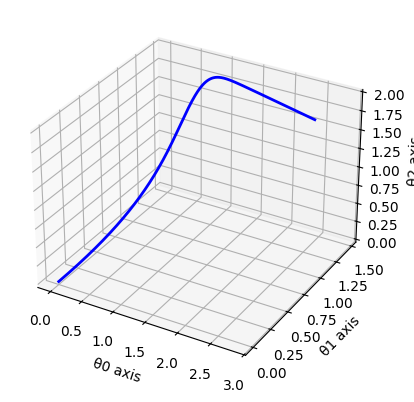

In [ ]:
alpha = 0.001
epoch = 10000
r = 800000
sgd_plot(alpha, epoch ,r ,X_train , Y_train)